In [1]:
# Pandas and numpy for data manipulation
import math
import pandas as pd
import numpy as np
np.random.seed(42)
from collections import OrderedDict
 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

# Import summary

In [2]:
def get_import_summary(str_file_path, 
                    str_sep = ",", 
                    str_decimal = ".", 
                    b_doublequote = False, 
                    dict_verify_dtype = None,
                    ls_exclude_var = None,
                    na_values = None):
    
    # Read in data
    df = pd.read_csv(str_file_path, 
                     sep=str_sep, 
                     decimal=str_decimal, 
                     doublequote=b_doublequote, 
                     dtype=dict_verify_dtype,
                     na_values=na_values)
    
    # initial summary
    ls_var = []
    ls_var_type = []
    ls_dist_val = []
    ls_mean = []
    ls_std = []
    ls_min = []
    ls_25 = []
    ls_50 = []
    ls_75 = []
    ls_max = []
    ls_sample = []
    
    # selected columns
    if ls_exclude_var is None:
        ls_selected_col = [col for col in df.columns]
    else:
        ls_selected_col = [col for col in df.columns if col not in ls_exclude_var]        
    df = df[ls_selected_col]
    
    # Describe for Numerical Columns
    df_num_desc = df.describe()
    
    # Value Counts for Categorical Columns
    
    # loop through each variables
    for col in df.columns:        
        if df[col].dtype != "object":
            # get var and var type
            ls_var.append(col)
            ls_var_type.append(df[col].dtype)

            # calculate distinct value
            i_dist_val = df[col].value_counts().shape[0]
            ls_dist_val.append(i_dist_val)
        
            # get numerical stats
            ls_mean.append(df_num_desc.loc["mean", col])
            ls_std.append(df_num_desc.loc["std", col])
            ls_min.append(df_num_desc.loc["min", col])
            ls_25.append(df_num_desc.loc["25%", col])
            ls_50.append(df_num_desc.loc["50%", col])
            ls_75.append(df_num_desc.loc["75%", col])
            ls_max.append(df_num_desc.loc["max", col])
            
            # get sample values        
            df_notnull = df[df[col].notnull()]
            i_num_sample = min([5, i_dist_val])
            str_sample = str(df_notnull[col][0:i_num_sample].tolist())
            ls_sample.append(str_sample)
        
    df_summary = pd.DataFrame(OrderedDict((
            ("variable", pd.Series(ls_var)),
            ("variable_type", pd.Series(ls_var_type)),
            ("n_distinct_values", pd.Series(ls_dist_val)),
            ("mean", pd.Series(ls_mean)),
            ("std", pd.Series(ls_std)),
            ("min", pd.Series(ls_min)),
            ("25p", pd.Series(ls_25)),
            ("50p", pd.Series(ls_50)),
            ("75p", pd.Series(ls_75)),
            ("max", pd.Series(ls_max)),
            ("sample_values", pd.Series(ls_sample))
        ))
    )
    return df, df_summary

In [3]:
# variable params
str_target_var = "reason"
ls_exclude_var = [
    "school"
]

# read data params
str_file_path = "data/student.csv"
str_sep = ","
str_decimal = "."
b_doublequote = True
na_values = "?"

dict_verify_dtype = {
    "G3": np.float
}

In [4]:
df, df_summary = get_import_summary(str_file_path, 
                                dict_verify_dtype=dict_verify_dtype,
                                ls_exclude_var=ls_exclude_var,
                                na_values=na_values)

print "Number of observations:", df.shape[0]
print "Number of variables:", df.shape[1]
print "Proportion of the target variable"
print df[str_target_var].value_counts()/df.shape[0]
display(df_summary)

Number of observations: 649
Number of variables: 32
Proportion of the target variable
course        0.439137
home          0.229584
reputation    0.220339
other         0.110940
Name: reason, dtype: float64


,variable,variable_type,n_distinct_values,mean,std,min,25p,50p,75p,max,sample_values
0,age,int64,8,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0,"[18, 17, 15, 15, 16]"
1,Medu,int64,5,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0,"[4, 1, 1, 4, 3]"
2,Fedu,int64,5,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0,"[4, 1, 1, 2, 3]"
3,traveltime,int64,4,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0,"[2, 1, 1, 1]"
4,studytime,int64,4,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0,"[2, 2, 2, 3]"
5,failures,int64,4,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0,"[0, 0, 0, 0]"
6,famrel,int64,5,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0,"[4, 5, 4, 3, 4]"
7,freetime,int64,5,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0,"[3, 3, 3, 2, 3]"
8,goout,int64,5,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0,"[4, 3, 2, 2, 2]"
9,Dalc,int64,5,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0,"[1, 1, 2, 1, 1]"


# Visualization of numerical data

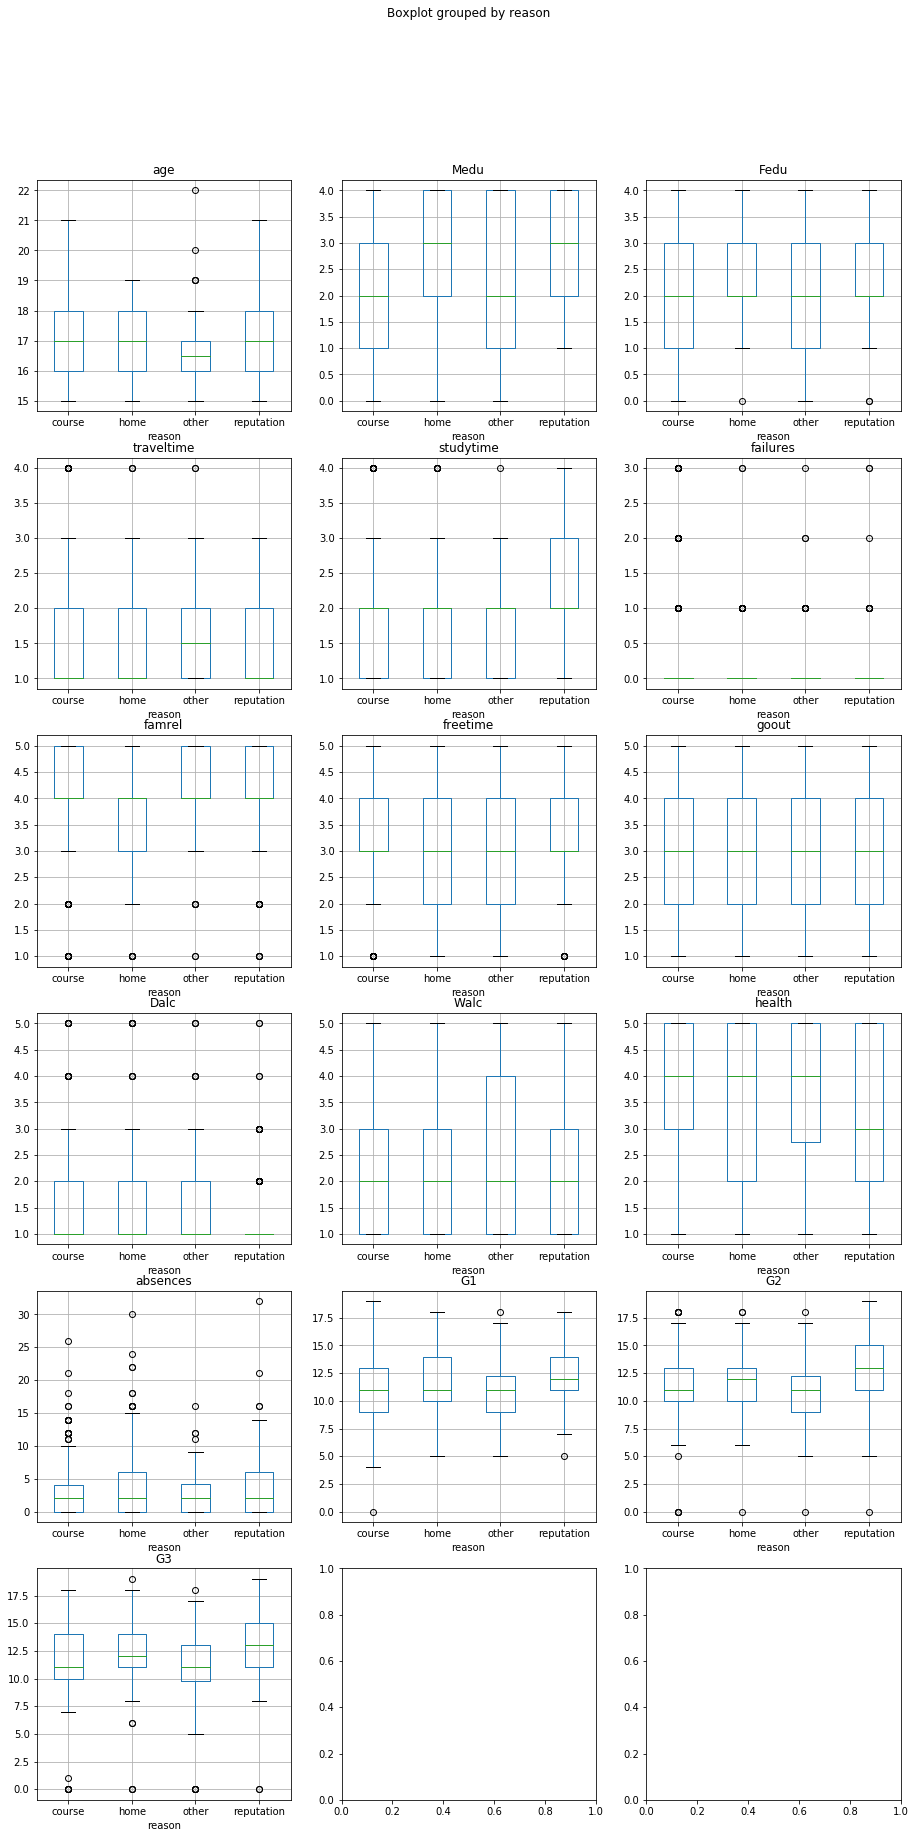

In [5]:
ls_num_data = [col for col in df.columns if df[col].dtype != "object"]
ncols = 3
nrows = int(math.ceil(len(ls_num_data) * 1.0 / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Visualization of numerical data
for idx, var in enumerate(ls_num_data):
    i = idx / ncols
    j = idx % ncols
    df.boxplot(column=var, by=str_target_var, ax=axes[i, j])

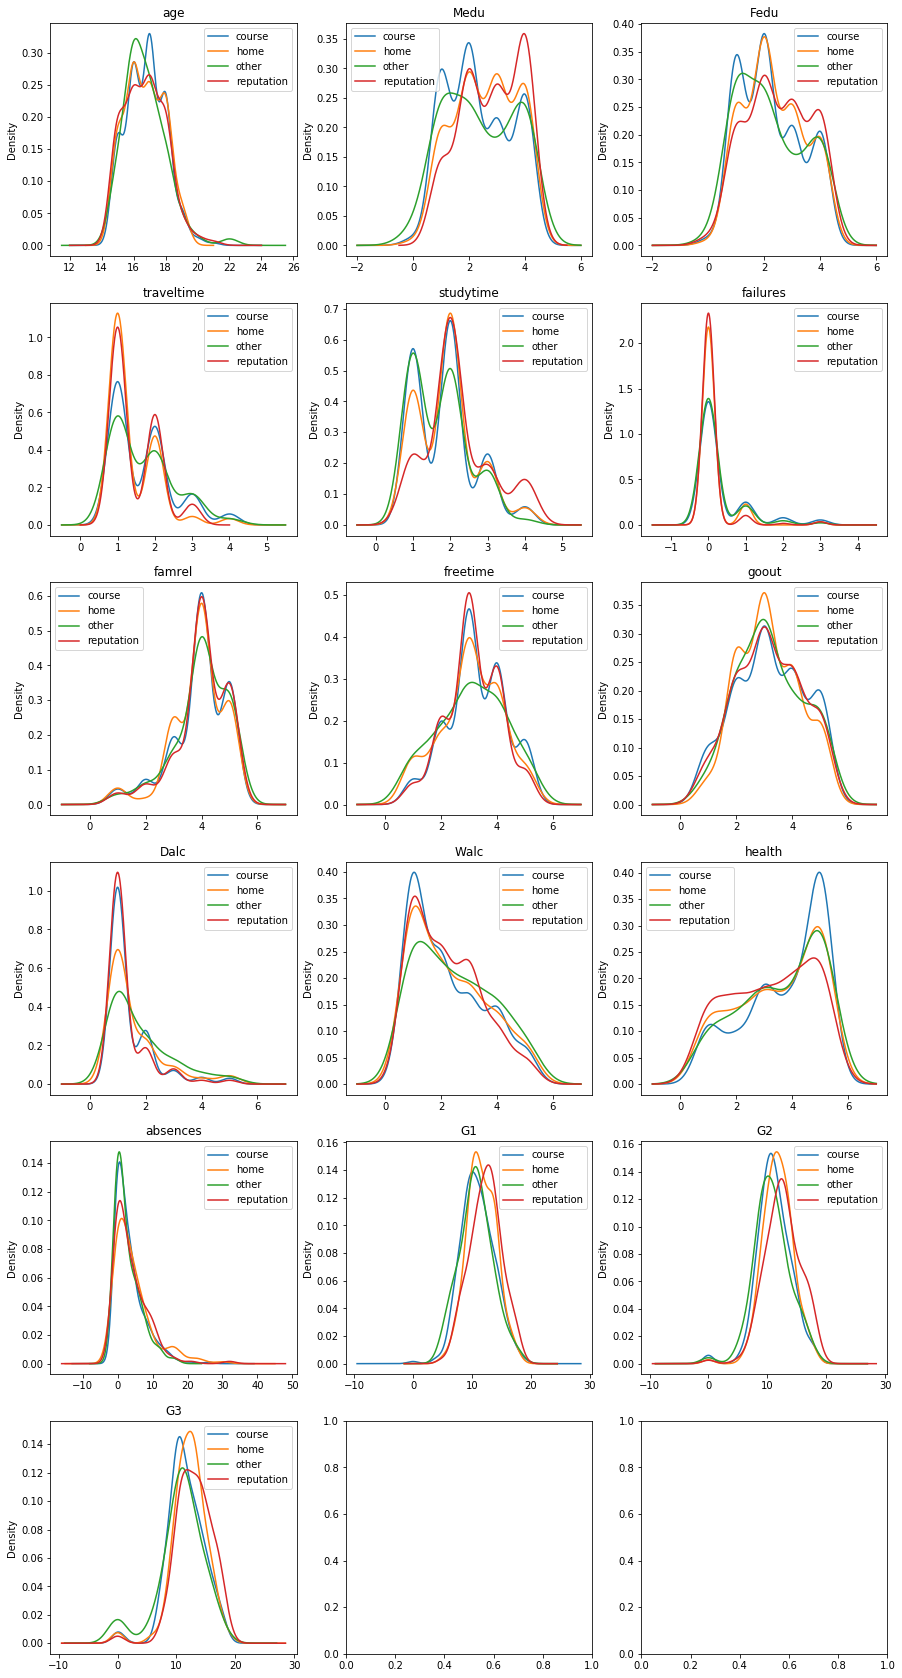

In [6]:
def plot_dens_data(df, col, str_target_var, ls_val_target, ax):
    dict_density = {}
    for target in ls_val_target:
        s_values = df[df[str_target_var] == target][col]
        dict_density[target] = s_values

    df_density = pd.DataFrame(dict_density)
    df_density.plot.kde(ax=ax, title=col)


# Visualization of numerical data
ls_num_data = [col for col in df.columns if df[col].dtype != "object"]
ncols = 3
nrows = int(math.ceil(len(ls_num_data) * 1.0 / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

ls_val_target = df[[str_target_var]].drop_duplicates()[str_target_var].tolist()
ls_num_data = [col for col in df.columns if df[col].dtype != "object"]
for idx, var in enumerate(ls_num_data):
    i = idx / ncols
    j = idx % ncols
    plot_dens_data(df, var, str_target_var, ls_val_target, ax=axes[i, j])

# Visualization of categorical data

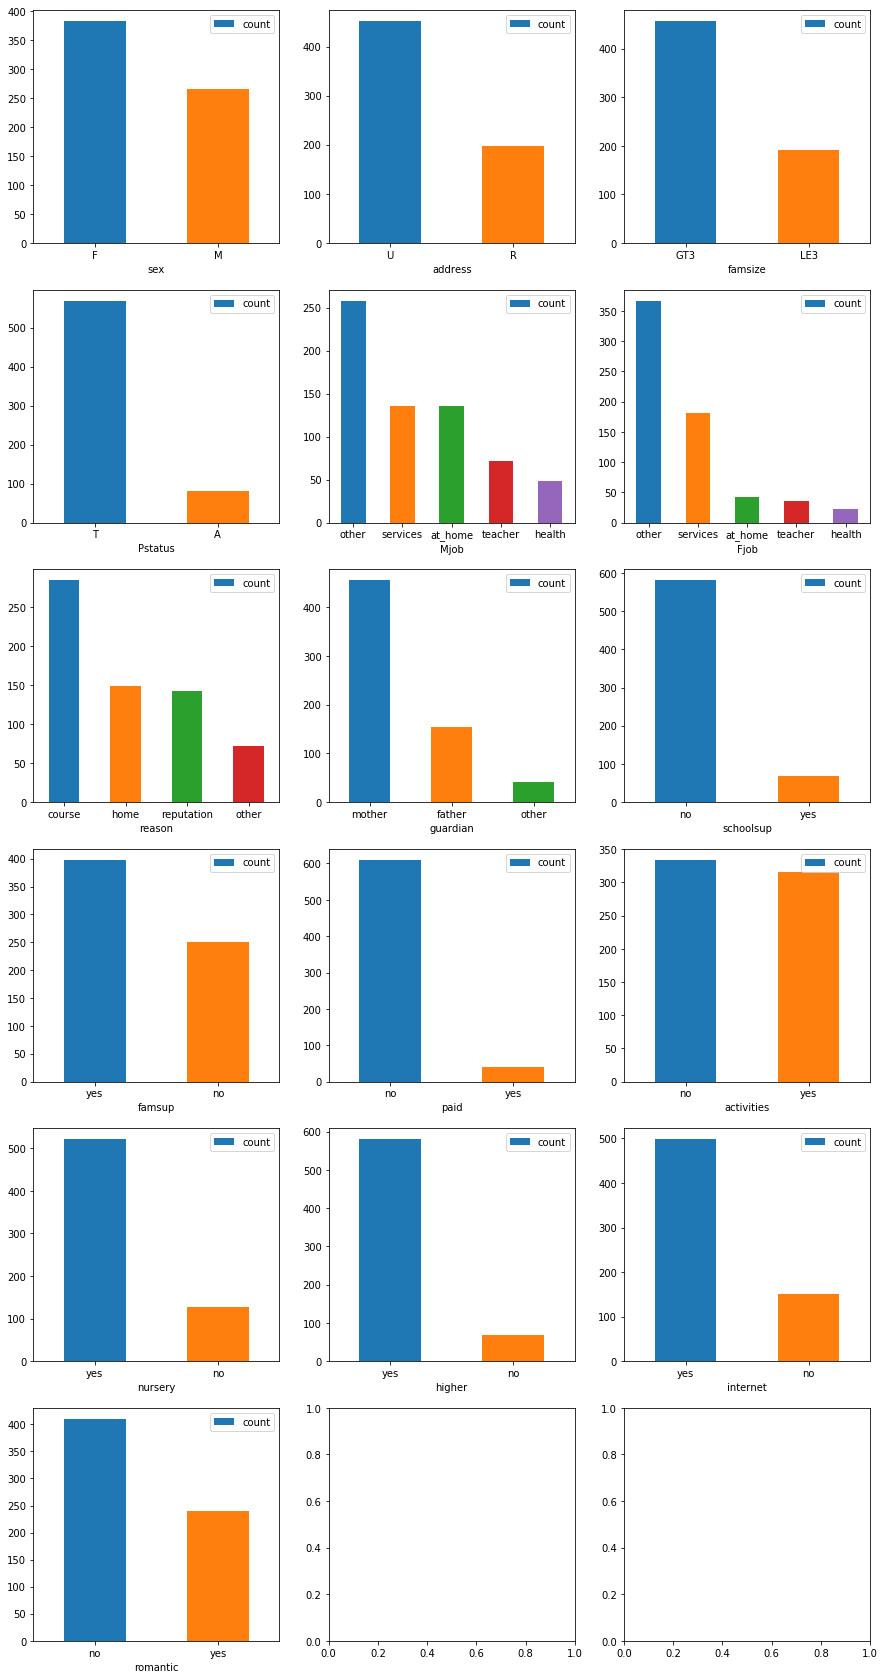

In [7]:
def plot_cat_data(df, col, ax):
    s_count = df[col].value_counts()
    x = s_count.index.tolist()
    y = s_count.values
    df_bar = pd.DataFrame({col: x, "count": y}, columns=[col, "count"])
    df_bar.plot.bar(x=col, y="count", rot=0, ax=ax)

ls_cat_data = [col for col in df.columns if df[col].dtype == "object"]    
ncols = 3
nrows = int(math.ceil(len(ls_cat_data) * 1.0 / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Visualization of categorical data
for idx, var in enumerate(ls_cat_data):
    i = idx / ncols
    j = idx % ncols
    plot_cat_data(df, var, axes[i, j])

# Missing values

In [8]:
# variable params
str_target_var = "cp_data"

# read data params
str_file_path = "data/horse_colic.csv"
str_sep = ","
str_decimal = "."
b_doublequote = True
na_values = "?"

df, df_summary = get_import_summary(str_file_path, 
                                dict_verify_dtype=dict_verify_dtype,
                                na_values=na_values)

print "Number of observations:", df.shape[0]
print "Number of variables:", df.shape[1]
print "Proportion of the target variable"

Number of observations: 300
Number of variables: 28
Proportion of the target variable


In [9]:
ls_var = []
ls_num_null = []
ls_pct_null = []
thres_pct = 10.0

for var in df.columns:
    df_isnull = df[df[var].isnull()]

    i_num_null = df_isnull.shape[0]
    i_num_obs = df.shape[0]
    f_pct_null = i_num_null * 100.0 / i_num_obs

    if f_pct_null > thres_pct:
        ls_var.append(var)
        ls_num_null.append(i_num_null)
        ls_pct_null.append(f_pct_null)

df_missing = pd.DataFrame(OrderedDict((
    ("variable", ls_var),
    ("Number of missing values", ls_num_null),
    ("% of missing values", ls_pct_null)
))).sort_values(["% of missing values"], ascending=False)
df_missing

,variable,Number of missing values,% of missing values
11,nasogastric reflux PH,247,82.333333
16,abdomcentesis total protein,198,66.000000
15,abdominocentesis appearance,165,55.000000
13,abdomen,118,39.333333
10,nasogastric reflux,106,35.333333
9,nasogastric tube,104,34.666667
12,rectal examination,102,34.000000
3,peripheral pulse,69,23.000000
0,rectal temperature,60,20.000000
1,respiratory rate,58,19.333333


# Variable importance

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X = df["Age"].values.reshape(-1, 1)
Y = df[str_target_var].values
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
from sklearn import metrics
y_true = Y
y_pred = logreg.predict(X)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=2)
metrics.auc(fpr, tpr)

0.5